#### 로지스틱 회기(Logistic Regression)=>p332~
- 선형 알고리즘에 Sigmoid 함수가 결합된 분류 알고리즘 
- 선형 회귀 방식을 이용한 이진 분류 알고리즘
- 분류 레이블 : 0 or 1
- 0~1 범위를 예측 결과로 갖는 모델 필요
    - 가설 결과에 Sigmoid 함수 적용

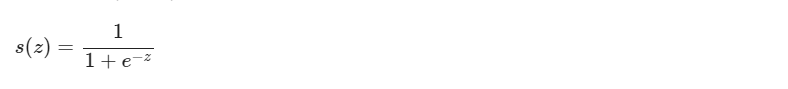

- z값을 0과 1사이의 값으로 바꾸는 함수
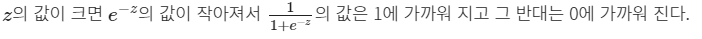

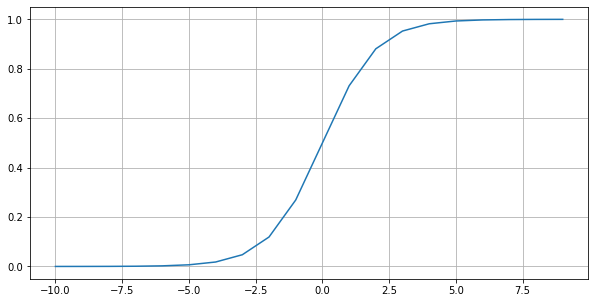

In [3]:
# Sigmoid 함수
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return  1/(1+np.exp(-z))

plt.figure(figsize=(10, 5))
x=np.arange(-10, 10)
y=sigmoid(x)

plt.plot(x, y)
plt.grid(True)
plt.show()

- x가 0보다 크면 y는 0.5 기준 긍정 결과
- x가 0보다 작으면 y는 0.5기준 부정 결과
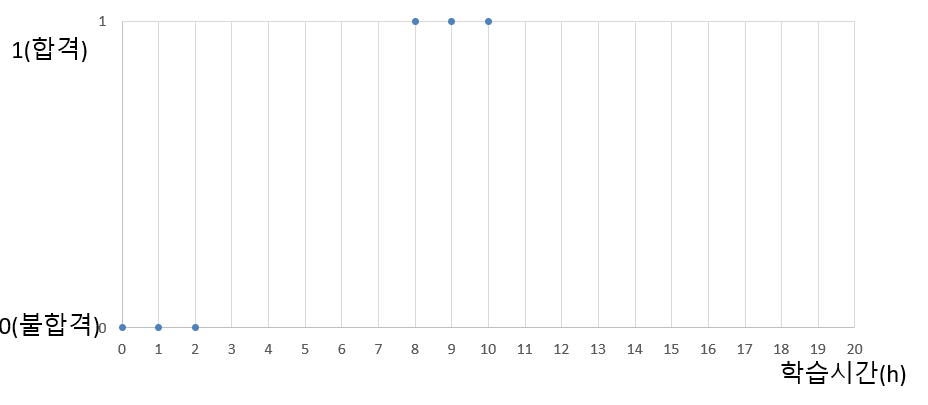

#### 로지스틱 회기
- 데이터 생성

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 샘플 생성(x값 생성)
ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma, 2))
Xb = np.random.randint(0,50, (mb, 2))
x = np.concatenate((Xa, Xb), axis=0).astype(np.float32)/100

In [15]:
# y값 생성
y = np.zeros((m,),dtype=np.float32)
y[mb:] = 1
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

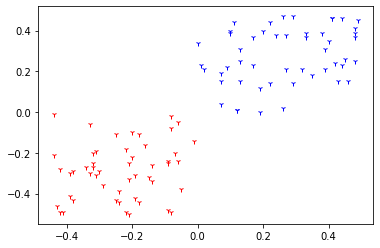

In [16]:
# 시각화
plt.plot(x[y==0][:,0], x[y==0][:, 1], 'r1')
plt.plot(x[y==1][:,0], x[y==1][:, 1], 'b1')

plt.show()

- 로지스틱 회기 적용

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf=LogisticRegression()
lr_clf.fit(x, y)
pred=lr_clf.predict(x)

In [19]:
x.shape

(100, 2)

In [20]:
x[0]

array([-0.09, -0.24], dtype=float32)

In [ ]:
accuracy_score(y,)